# ASSIGNMENT 4

## Task 1: Motion Estimation and Event Detection in a Video

**Objective:** Detect motion and specific events in a video using frame differencing or optical flow to estimate motion and identify events without machine learning.

### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from moviepy.video.io import ImageSequenceClip

In [2]:
def generateOutputVideo(img_list,file_name):
    clip = ImageSequenceClip.ImageSequenceClip(img_list,fps=fps)
    clip.write_videofile(file_name+'.mp4')

In [3]:
def plotFn(row, col, f_s, img_list, title, color=None):
    l = len(img_list)
    if l==0:
        return "Empty list!"
    fig, axes = plt.subplots(row,col,figsize=f_s)

    for i in range(row):
        for j in range(col):
            n = col*i + j
            if n>=l:
                break
            axes[i][j].imshow(img_list[n],cmap=color)
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
            axes[i][j].set_title(title + " " + str(n))
    
    plt.show()

In [4]:
def getFrameList(video):
    success = True
    frameList = []
    while success:
        success, frame = video.read()
        if not success:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frameList.append(frame)
    return frameList

### 1. Load Video:
- Load the provided video using OpenCV.

In [6]:
vid_path = r'Desktop/LAB/sem 7/MV/Task 4/bottle.mp4'
video = cv2.VideoCapture(vid_path)
fps = video.get(cv2.CAP_PROP_FPS)

In [7]:
frameList = getFrameList(video)
len(frameList)

90

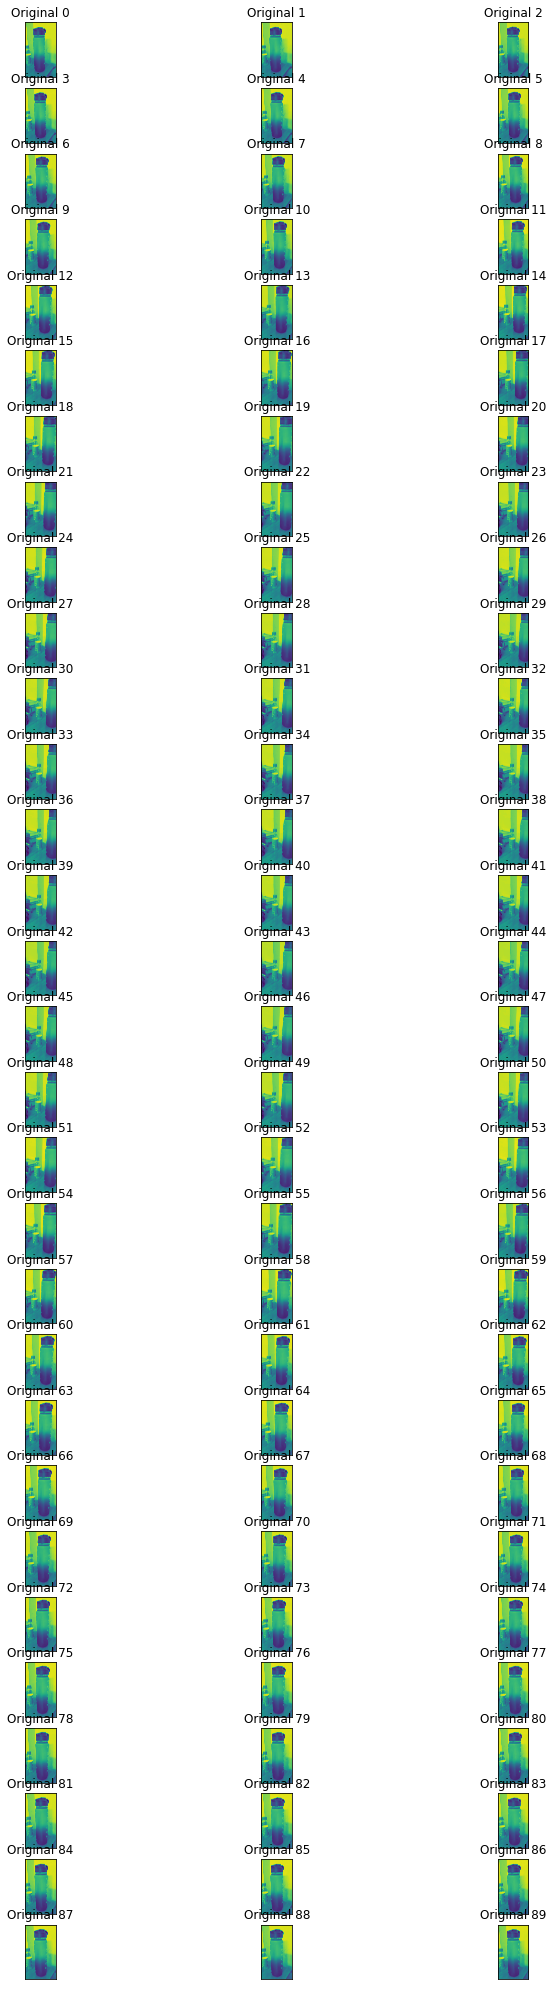

In [16]:
n = 90
plotFn(30, 3, (12,36), frameList[:n], "Original")

### 2. Motion Estimation:
- Use frame differencing (Histogram comparision) to detect changes between consecutive frames.
- Subtract consecutive frames and threshold the difference to identify regions of motion.

In [17]:
def compute_histogram(image):
    return cv2.calcHist([image], [0], None, [256], [0, 256])

In [18]:
def getChanges(frameList):
    histograms_list = [compute_histogram(i) for i in frameList]
    similarity_list = [cv2.compareHist(histograms_list[i-1], histograms_list[i], cv2.HISTCMP_CORREL) for i in range(1,len(histograms_list))]
    difference_list = [cv2.absdiff(frameList[i-1], frameList[i]) for i in range(1,len(frameList))]
    thresh_list = [cv2.threshold(i, 25, 255, cv2.THRESH_BINARY)[1] for i in difference_list]
    return similarity_list, thresh_list

In [19]:
similarity_list, thresh_list = getChanges(frameList)

In [22]:
similarity_list[10:40]

[0.984786705642897,
 0.9923773002334828,
 0.9913153261757661,
 0.9940113412953994,
 0.9948663953589497,
 0.9923849103628478,
 0.9918399836663907,
 0.9952495037804066,
 0.9966706838880572,
 0.9960778264506251,
 0.996544396814718,
 0.9951640301632481,
 0.9979751568176272,
 0.9984281308755257,
 0.993046952522906,
 0.9980416768453305,
 0.995821341502381,
 0.9957886343419461,
 0.9975919808588779,
 0.9857808111841541,
 0.9919303471011715,
 0.9947625110485686,
 0.9983630075490886,
 0.9978299755632023,
 0.9972440004968803,
 0.9991954127607482,
 0.9989019571187102,
 0.999437504733576,
 0.9996334526325119,
 0.9996135769875194]

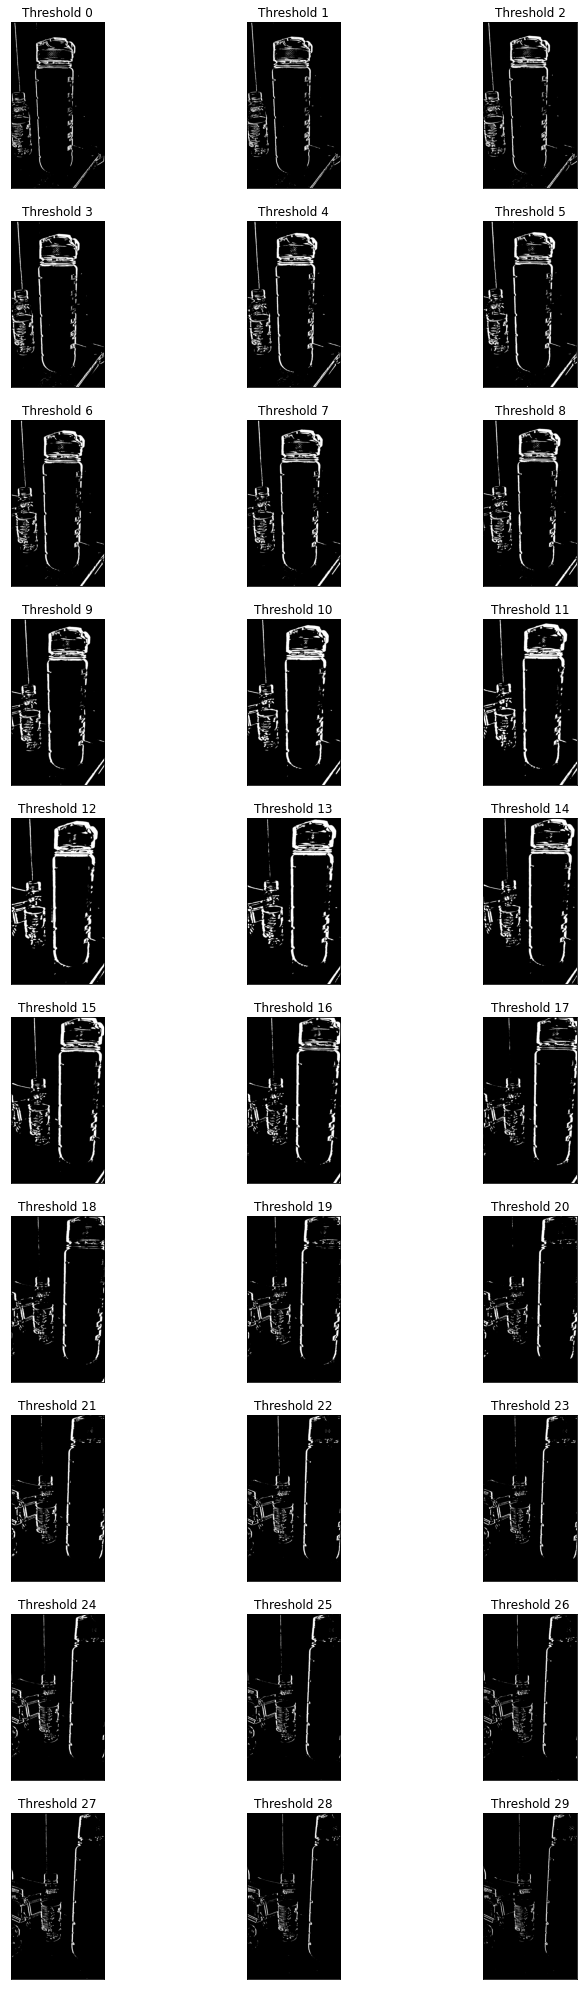

In [24]:
plotFn(10, 3, (12,36), thresh_list[:n], "Threshold",'gray')

### 3. Event Detection:
- Detect significant motion events, such as sudden movements or object appearances, based on the intensity of motion detected in specific regions.
- Identify and mark frames where events occur based on changes in motion intensity or region activity.

In [25]:
def getContours(thresh, frame):
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust area threshold as needed
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return frame

In [26]:
contours_list = [getContours(thresh_list[i], frameList[i]) for i in range(len(thresh_list))]

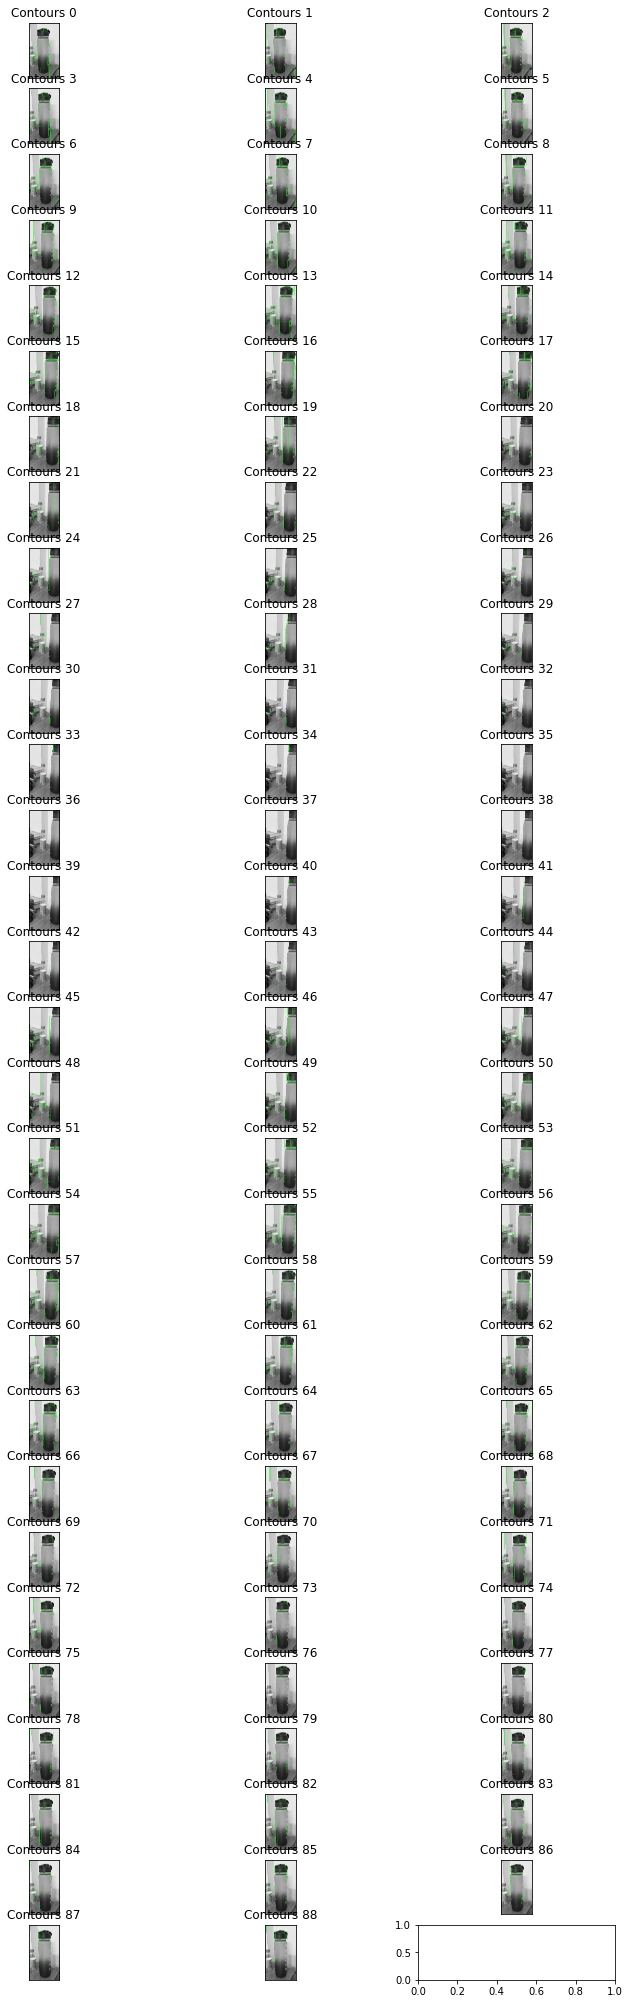

In [28]:
plotFn(30, 3, (12,36), contours_list[:n], "Contours",'gray')

### 4. Result:
- Visualize motion by highlighting moving regions in each frame.
- Display and annotate the frames where events were detected, along with timestamps.